In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/features/embeddings.pkl
/kaggle/input/features/filenames.pkl
/kaggle/input/fashion-articles/articles.csv
/kaggle/input/h-and-m-personalized-fashion-recommendations/sample_submission.csv
/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv
/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv
/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/057/0570177001.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/057/0575944002.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/057/0576129001.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/057/0570806001.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/057/0572155001.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/057/0576693003.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/imag

In [12]:
import pickle
import tensorflow
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
import cv2


In [13]:

feature_list = np.array(pickle.load(open('/kaggle/input/features/embeddings.pkl','rb')))
filenames = pickle.load(open('/kaggle/input/features/filenames.pkl','rb'))


In [14]:

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])


In [78]:

img = image.load_img('/kaggle/input/gopal-tt/WhatsApp Image 2024-03-31 at 4.31.25 PM.jpeg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

print(indices)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[   362  54166  54237 101248   7215  52277]]


In [79]:
distances,indices

(array([[0.69609157, 0.70655062, 0.71785166, 0.72481166, 0.72549877,
         0.7256181 ]]),
 array([[   362,  54166,  54237, 101248,   7215,  52277]]))

In [80]:
for file in indices[0][0:4]:
    print(filenames[file])
    temp_img = cv2.imread(filenames[file])

/kaggle/input/h-and-m-personalized-fashion-recommendations/images/057/0577202001.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/050/0508638007.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/050/0508638024.jpg
/kaggle/input/h-and-m-personalized-fashion-recommendations/images/079/0791492002.jpg


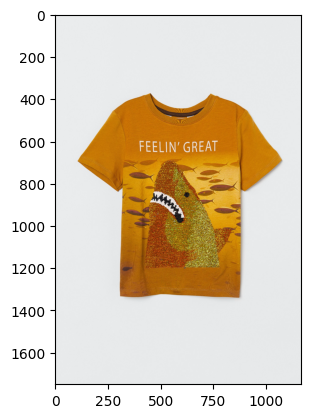

In [81]:
import matplotlib.pyplot as plt
plt.imshow(temp_img)


In [ ]:
cv2.imshow('output',cv2.resize(temp_img,(512,512)))

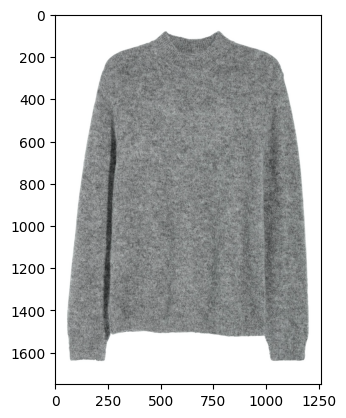

In [21]:
for file in indices[0][1:6]:
    temp_img = cv2.imread(filenames[file])
    plt.imshow(temp_img)
    cv2.waitKey(0)
